<a href="https://www.kaggle.com/code/mohammadabdelhalim/car-price-prediction?scriptVersionId=127209044" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Reading data 

In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
# Getting info about data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
#descibing data 
df[["Price","Cylinders","Airbags","Levy"]].describe()

,Price,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,4.582991,6.582627
std,1.905813e+05,1.199933,4.320168
min,1.000000e+00,1.000000,0.000000
25%,5.331000e+03,4.000000,4.000000
50%,1.317200e+04,4.000000,6.000000
75%,2.207500e+04,4.000000,12.000000
max,2.630750e+07,16.000000,16.000000


# Cleaning 

In [5]:
# checking for null values
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [6]:
# finding number of duplicates
df.duplicated().sum()

313

In [7]:
#dropping duplicates
df.drop_duplicates(inplace=True, ignore_index= True)
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
18919,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
18920,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
18921,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
18922,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
18923,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [8]:
# checking for rows having "-" instead of null 
df[df["Levy"] =="-"]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18910,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
18911,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
18913,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
18916,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


In [9]:
#replacing"-" in col "levy" with null value and change data type to float
df["Levy"] = df["Levy"].replace("-", 0).astype(int)
print(df["Levy"].dtype)
df[df["Levy"] =="-"].shape

int64


(0, 18)

In [10]:
# rename and change data type of col
df["Mileage"] = df["Mileage"].str.replace("km","").astype(int)
df.rename(columns={"Mileage":"Mileage(km)"}, inplace=True)


In [11]:
df['Engine volume'] = df['Engine volume'].str.lower()

# creating a new Turbo col 
df['Turbo'] = df['Engine volume'].str.contains('turbo')


df['Engine volume'] = df['Engine volume'].str.slice(0,3)

In [12]:
df["Doors"].value_counts()

04-May    18032
02-Mar      768
>5          124
Name: Doors, dtype: int64

In [13]:
# replacing "May" & "Mar" with "5" & "3"
df["Doors"] = df["Doors"].str.replace("04-May","4-5")
df["Doors"] = df["Doors"].str.replace("02-Mar","2-3")


In [14]:
# dropping ID col
df.drop(columns="ID", inplace=True)

In [15]:
# converting "yes" and "no" to boolean
df["Leather interior"] = df["Leather interior"].map({"Yes": True, "No": False})

In [16]:
# replacing 0 values with median 
df[df["Levy"] == 0].shape


(5709, 18)

In [17]:
df["Levy"].replace(0)

0        1399
1        1018
2        1018
3         862
4         446
         ... 
18919    1055
18920     831
18921     836
18922    1288
18923     753
Name: Levy, Length: 18924, dtype: int64

In [18]:
# converting Engine volume from object to float and Cylinders from float to int
df["Engine volume"] = df["Engine volume"].astype(float)
df["Cylinders"] = df["Cylinders"].astype(int)

# EDA


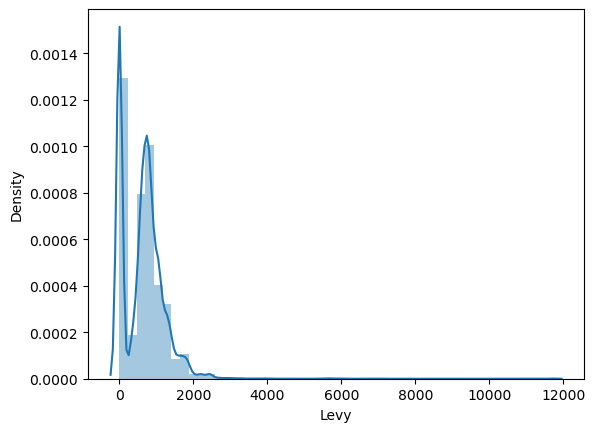

In [19]:

sns.distplot(df["Levy"], kde=True);

**Most Values are between 0 and 2000**

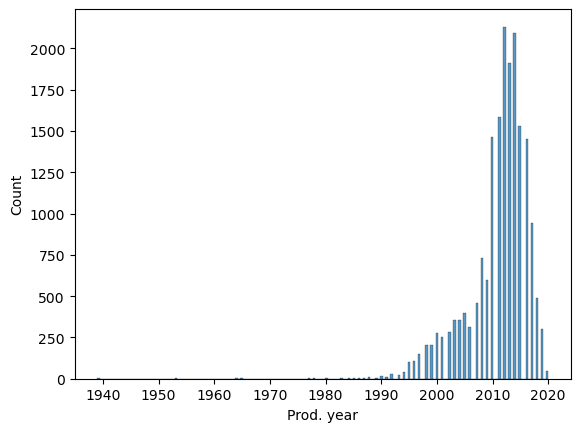

In [20]:
sns.histplot(df["Prod. year"]);

**Most made from 2010-2020**

''

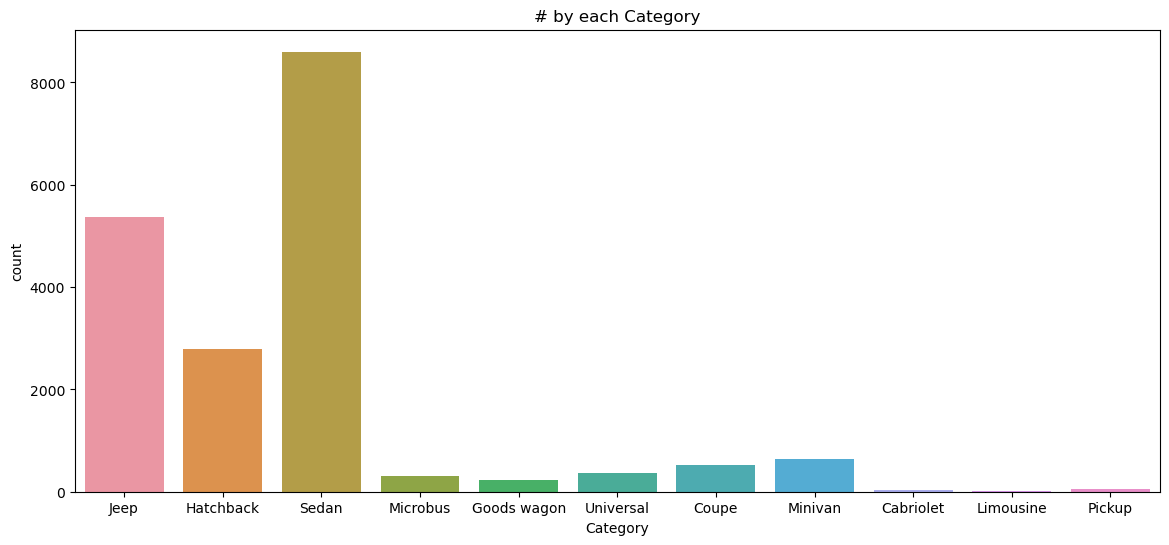

In [21]:
plt.subplots(figsize=(14,6))
sns.countplot(data= df, x='Category')
plt.title("# by each Category")
;

**Most are Sedan, Jeep then Hatchback**

In [22]:

mean_price_by_category = df.groupby('Category', as_index= False)['Price'].mean()
mean_price_by_category

,Category,Price
0,Cabriolet,24407.971429
1,Coupe,21282.356061
2,Goods wagon,124840.104803
3,Hatchback,11354.611647
4,Jeep,23760.507252
5,Limousine,11534.454545
6,Microbus,18538.933110
7,Minivan,20601.456556
8,Pickup,29362.392157
9,Sedan,14202.733837


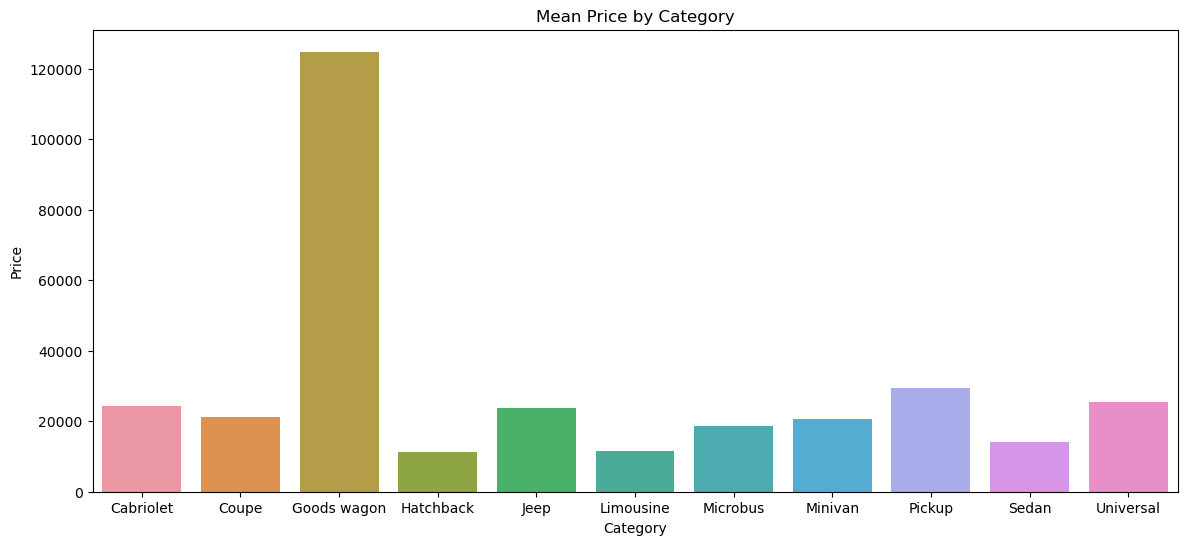

In [23]:
plt.subplots(figsize=(14,6))
sns.barplot(data= df, x=mean_price_by_category["Category"], y=mean_price_by_category["Price"])
plt.title("Mean Price by Category");

**Goods wagon is expensive and few in number, On the other side Sedan, Jeep and Hatchback are not expensive**

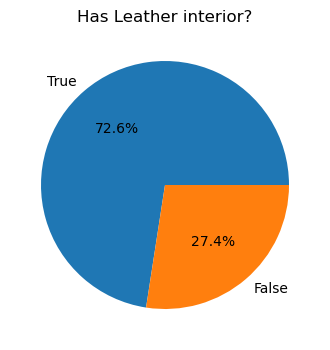

In [24]:
# Calculate the counts of each category in the 'Leather interior' column
counts = df['Leather interior'].value_counts()

# Create a pie chart of the counts
plt.figure(figsize=(4, 6))
plt.pie(counts, labels=counts.index,autopct='%1.1f%%')

# Add a title
plt.title("Has Leather interior?")

# Show the chart
plt.show()


**Most Have Leather interior**

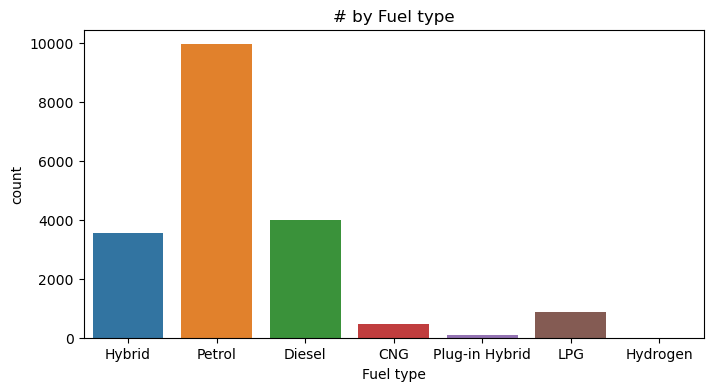

In [25]:
plt.subplots(figsize=(8,4))
sns.countplot(data= df, x='Fuel type')
plt.title("# by Fuel type");

**Most use Petrol**

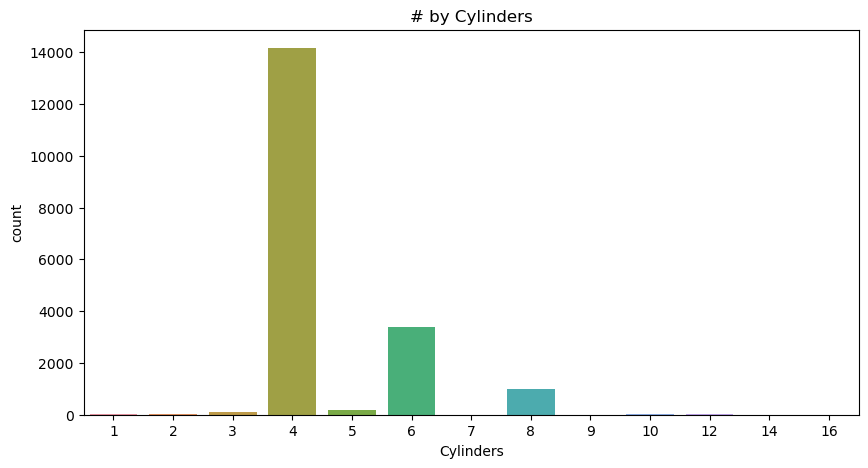

In [26]:
plt.subplots(figsize=(10,5))
sns.countplot(data= df, x='Cylinders')
plt.title("# by Cylinders");


**Most have 4 Cylinders**

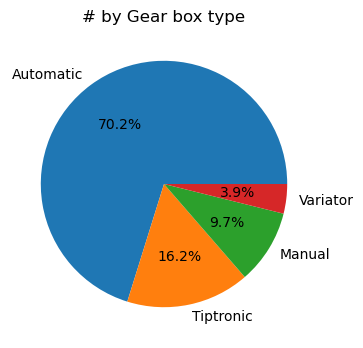

In [27]:
counts = df['Gear box type'].value_counts()

plt.figure(figsize=(8,4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("# by Gear box type")
plt.show()


**Most are automatic**

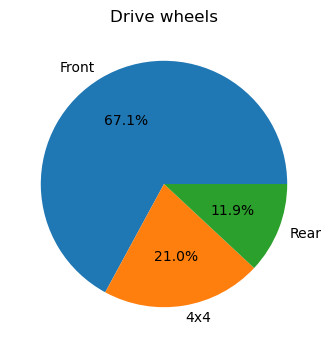

In [28]:
counts = df['Drive wheels'].value_counts()

plt.figure(figsize=(8,4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Drive wheels")
plt.show();




**Most are Front drive wheels**

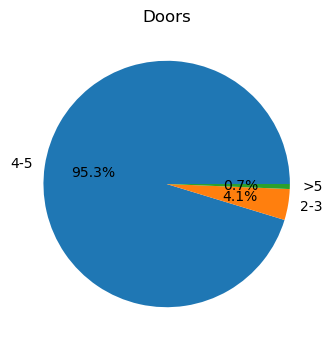

In [29]:
counts = df['Doors'].value_counts()

plt.figure(figsize=(8,4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title("Doors")
plt.show()


**4-5 doors is the most**

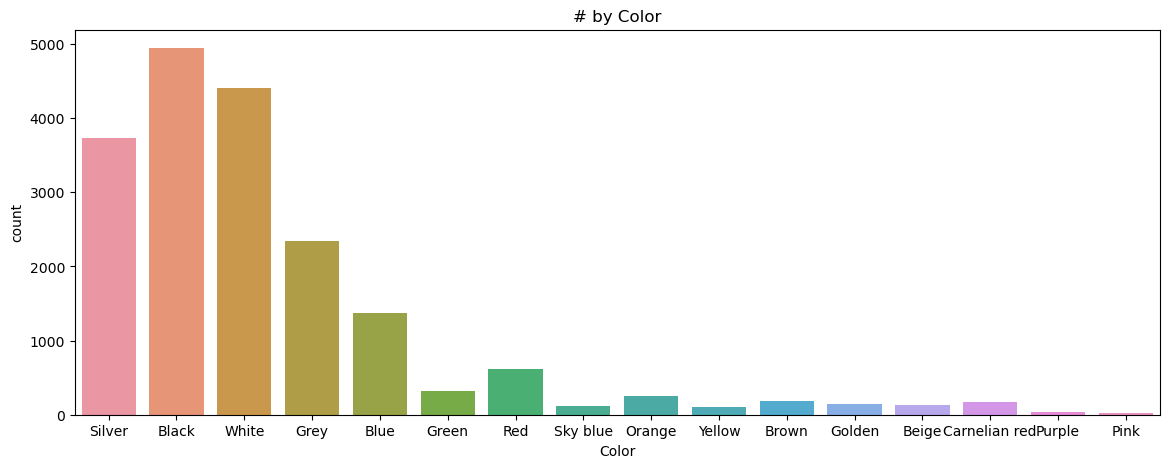

In [30]:
plt.subplots(figsize=(14,5))
sns.countplot(data= df, x='Color')
plt.title("# by Color");

**Most colors are black, white and silver**

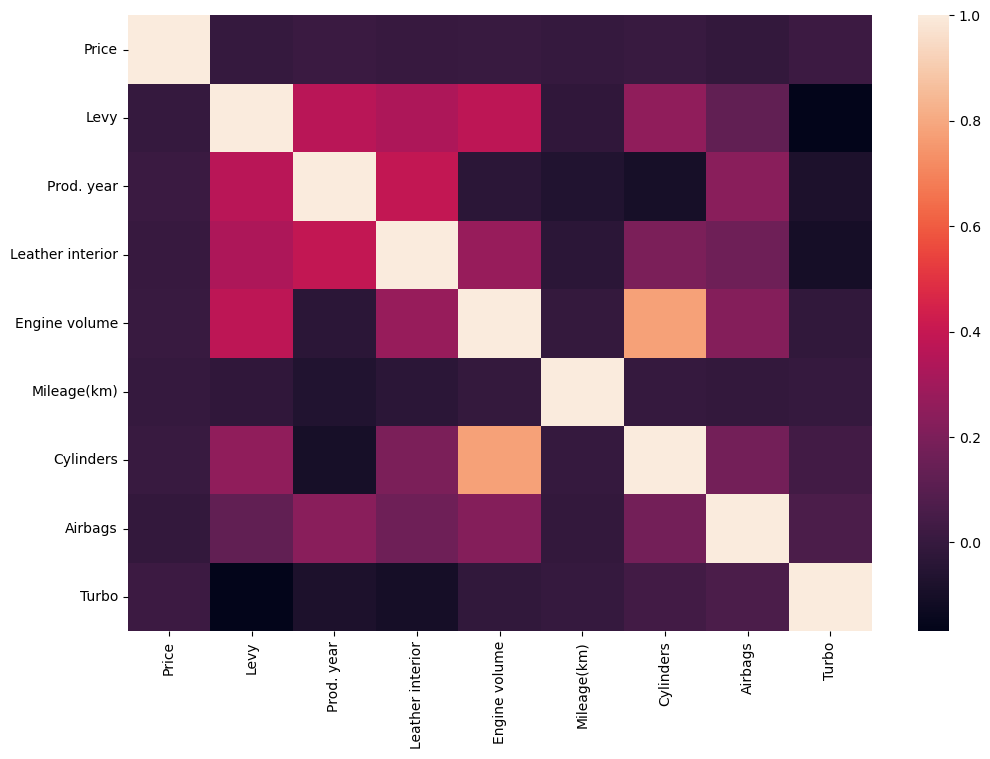

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr());



**The number of cylinders and engine volume of a car are typically positively correlated**

In [32]:
# handling outliers using lower and upper bound 
def handle_outliers(df, col_names):
    for col in col_names:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound
    return df


In [33]:
cols = ["Price","Levy","Engine volume","Airbags","Cylinders","Mileage(km)"]

df = handle_outliers(df,cols)

# Building the model

In [34]:
# Selecting numeric and categorical features
numeric_features = ['Levy', 'Prod. year', 'Engine volume', 'Mileage(km)', 'Cylinders', 'Airbags']
categorical_features = ['Manufacturer', 'Model', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Leather interior', 'Turbo']

In [35]:
# Creating a pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [36]:
# Creating a pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [37]:
# Applying the pipeline on the entire dataset
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [38]:
# Creating the Linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1))
])


In [39]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Price", axis=1),
                                                    df["Price"],
                                                    test_size=0.2,
                                                    random_state=42)


In [40]:

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)
X_pred = model.predict(X_train)



In [41]:

# Calculating the accuracy of the model
accuracy = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error:", mse)

print("Accuracy:", accuracy)

Mean squared error: 97454389.92007141
Accuracy: 0.4638998146779171
